### 1. train.csv : 학습 데이터
- id : 샘플 아이디
- Species: 펭귄의 종을 나타내는 문자열
- Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
- Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
- Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
- Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
- Flipper Length (mm) : 펭귄의 팔(날개) 길이
- Sex : 펭귄의 성별
- Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
- Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율
- Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g)


### 2. test.csv : 테스트 데이터
- id : 샘플 아이디
- Species: 펭귄의 종을 나타내는 문자열
- Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
- Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
- Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
- Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
- Flipper Length (mm) : 펭귄의 팔(날개) 길이
- Sex : 펭귄의 성별
- Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
- Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


df= pd.read_csv('dataset/train.csv')

In [135]:
df.head(1)

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550


In [136]:
df[df.isnull().sum(axis=1)>0]

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
6,6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
18,18,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184,MALE,NaN,NaN,4650
70,70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650
109,109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700


In [137]:
# sex 결측값 삭제
df= df.dropna(subset=['Sex'])
df.head(1)

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550


In [138]:
# # label encoding
# from sklearn.preprocessing import LabelEncoder 
# le= LabelEncoder()


In [139]:
# one hot
island= pd.get_dummies(df['Island'])
species= pd.get_dummies(df['Species'])
clutch= pd.get_dummies(df['Clutch Completion'])
sex= pd.get_dummies(df['Sex'])

df= df.drop(['Island','Species','Clutch Completion','Sex'],axis=1)
df= df.join(island)
df= df.join(species)
df= df.join(clutch)
df= df.join(sex)
df.head()

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g),Biscoe,Dream,Torgersen,Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica),Gentoo penguin (Pygoscelis papua),No,Yes,FEMALE,MALE
0,0,50.0,15.3,220,8.30515,-25.19017,5550,1,0,0,0,0,1,0,1,0,1
1,1,49.5,19.0,200,9.63074,-24.34684,3800,0,1,0,0,1,0,1,0,0,1
2,2,45.1,14.4,210,8.51951,-27.01854,4400,1,0,0,0,0,1,0,1,1,0
3,3,44.5,14.7,214,8.20106,-26.16524,4850,1,0,0,0,0,1,0,1,1,0
4,4,49.6,16.0,225,8.38324,-26.84272,5700,1,0,0,0,0,1,1,0,0,1


In [140]:
df.columns = ["id",'clength','cdepth','flength','nrate','crate','g','Biscoe','Torgersen','Dream',
              'S_adelie','S_chinstrap','S_gentoo','Clutch_n','Clutch_y','female','male']

df.head(1)

,id,clength,cdepth,flength,nrate,crate,g,Biscoe,Torgersen,Dream,S_adelie,S_chinstrap,S_gentoo,Clutch_n,Clutch_y,female,male
0,0,50.0,15.3,220,8.30515,-25.19017,5550,1,0,0,0,0,1,0,1,0,1


In [141]:
df.describe()

,id,clength,cdepth,flength,nrate,crate,g,Biscoe,Torgersen,Dream,S_adelie,S_chinstrap,S_gentoo,Clutch_n,Clutch_y,female,male
count,111.000000,111.000000,111.000000,111.000000,109.000000,109.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,57.270270,44.717117,17.000000,203.162162,8.738543,-25.718804,4333.333333,0.504505,0.396396,0.099099,0.351351,0.225225,0.423423,0.108108,0.891892,0.495495,0.504505
std,32.794386,5.290899,1.925192,14.731253,0.569673,0.859178,787.518639,0.502247,0.491367,0.300150,0.479558,0.419625,0.496342,0.311925,0.311925,0.502247,0.502247
min,0.000000,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.500000,40.450000,15.250000,190.000000,8.273760,-26.420180,3675.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,57.000000,45.200000,17.200000,199.000000,8.632590,-25.955410,4250.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,85.500000,49.150000,18.600000,216.000000,9.271580,-25.001690,4875.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,113.000000,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


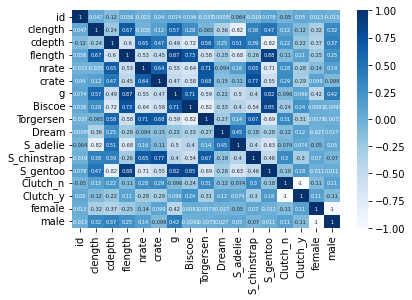

In [142]:
corr = df.corr(method = 'pearson')

df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 5},cmap = 'Blues')



In [168]:
# crate / nrate랑 상관계수 높은 columns
corr_df= df.corr()

a= corr_df['nrate']>0.4
a= pd.DataFrame(a)
a= a.loc[a['nrate']==True,:]
print(a.index)

b= corr_df['crate']>0.4
b= pd.DataFrame(b)
b= b.loc[b['crate']==True,:]
print(b.index)

Index(['cdepth', 'nrate', 'crate', 'Torgersen', 'S_chinstrap'], dtype='object')
Index(['cdepth', 'nrate', 'crate', 'Torgersen', 'S_chinstrap'], dtype='object')


In [169]:
# 상관계수 낮은 Clutch_n / Clutch_y 삭제

df= df.drop(columns=['Clutch_n','Clutch_y'])
df

,id,clength,cdepth,flength,nrate,crate,g,Biscoe,Torgersen,Dream,S_adelie,S_chinstrap,S_gentoo,female,male
0,0,50.0,15.3,220,8.30515,-25.19017,5550,1,0,0,0,0,1,0,1
1,1,49.5,19.0,200,9.63074,-24.34684,3800,0,1,0,0,1,0,0,1
2,2,45.1,14.4,210,8.51951,-27.01854,4400,1,0,0,0,0,1,1,0
3,3,44.5,14.7,214,8.20106,-26.16524,4850,1,0,0,0,0,1,1,0
4,4,49.6,16.0,225,8.38324,-26.84272,5700,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,36.6,17.8,185,NaN,NaN,3700,0,0,1,1,0,0,1,0
110,110,39.2,18.6,190,9.11006,-25.79549,4250,0,1,0,1,0,0,0,1
111,111,43.2,18.5,192,8.97025,-26.03679,4100,0,1,0,1,0,0,0,1
112,112,46.9,16.6,192,9.80589,-24.73735,2700,0,1,0,0,1,0,1,0
